<a href="https://colab.research.google.com/github/thehapyone/Thesis_Project/blob/master/data_evaluation_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature Engineering & Cleaning
Here we will perform some data cleaning and also a minimum feature engineering on the dataset
Activites inculude:


*   Remove duplicate features
*   Remove features with standard deviation equals 0
*   Analyze Missing Values


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [0]:
data_full = pd.read_csv("drive/My Drive/Thesis/data/Data_Engineering/Edited_Raw_Data/v3_Sorted_Raw_Db_with_RUL.csv", sep=',', low_memory=False)
#data_comb = pd.read_csv("drive/My Drive/Thesis/data/Data_Engineering/Edited_Raw_Data/v2_Sorted_Database.csv", sep=',', low_memory=False)


In [0]:
data_full.shape

(19954, 449)

In [0]:
data_full

,BIWEEK_SEND_DATE,Malfunction_Label,RUL,DELIVERY_DATE,DELIVERY_DATE.1,LAST_RUN,LAST_RUN.1,T_CHASSIS,INT_BWSD,LX_PMU_P1FH1_SLOPE_X_INDEX_10,LX_PMU_P1FH1_SLOPE_X_INDEX_11,LX_PMU_P1FH1_SLOPE_X_INDEX_12,LX_PMU_P1FH1_SLOPE_X_INDEX_13,LX_PMU_P1FH1_SLOPE_X_INDEX_14,LX_PMU_P1FH1_SLOPE_X_INDEX_15,LX_PMU_P1FH1_SLOPE_X_INDEX_16,LX_PMU_P1FH1_SLOPE_X_INDEX_17,LX_PMU_P1FH1_SLOPE_X_INDEX_18,LX_PMU_P1FH1_SLOPE_X_INDEX_19,LX_PMU_P1FH1_SLOPE_X_INDEX_2,LX_PMU_P1FH1_SLOPE_X_INDEX_20,LX_PMU_P1FH1_SLOPE_X_INDEX_21,LX_PMU_P1FH1_SLOPE_X_INDEX_22,LX_PMU_P1FH1_SLOPE_X_INDEX_23,LX_PMU_P1FH1_SLOPE_X_INDEX_24,LX_PMU_P1FH1_SLOPE_X_INDEX_25,LX_PMU_P1FH1_SLOPE_X_INDEX_26,LX_PMU_P1FH1_SLOPE_X_INDEX_27,LX_PMU_P1FH1_SLOPE_X_INDEX_28,LX_PMU_P1FH1_SLOPE_X_INDEX_29,LX_PMU_P1FH1_SLOPE_X_INDEX_3,LX_PMU_P1FH1_SLOPE_X_INDEX_30,LX_PMU_P1FH1_SLOPE_X_INDEX_31,LX_PMU_P1FH1_SLOPE_X_INDEX_4,LX_PMU_P1FH1_SLOPE_X_INDEX_5,LX_PMU_P1FH1_SLOPE_X_INDEX_6,LX_PMU_P1FH1_SLOPE_X_INDEX_7,LX_PMU_P1FH1_SLOPE_X_INDEX_8,LX_PMU_P1FH1_SLOPE_X_INDEX_9,LX_PMU_P1FWM_ENGINE_SPEED_TORQUE_H_X_INDEX_1,...,VAR_UBX_HYDRAULIC_PUMP_ENG_MTD,VAR_4QB_BODYBUILDER_EL_INTERFCAB_CHAS,VAR_REX_CRANK_CASE_VENTILATION,VAR_78X_TRANSPORT_CYCLE,VAR_T2X_TRANSMISSIONRETARDER_COOLER,VAR_U4X_BRAKE_DRIVE_REAR,VAR_FVX_FRONT_AXLE_LOAD,VAR_VWX_COMPRESSOR_CAPACITY,VAR_H1B_TURBO_APPLICATION,VAR_FDX_REAR_AXLE_ARRANGEMENT,VAR_7PX_HYDRAULIC_PUMP_GEARBOX_MOUNTED,VAR_7NA_FRONT_SUSPENSION_INSTALLATION,VAR_LKX_DRIVER_STATE_SENSING_SYSTEM,VAR_QWX_TURBO,VAR_FZX_FRONT_AXLE_ARRANGEMENT,VAR_V6X_RETARDER,VAR_K4C_VEHICLE_UPTIME_SETTINGS,VAR_0RA_REGENERATION_CONTROLS_DPF,VAR_YKX_FRONT_SUSPENSION_SYSTEM,VAR_T3X_PTO_ENGINE_REAR_MOUNTED,VAR_PJX_ALTERNATOR_CAPACITY,VAR_41X_PARKING_HEATER,VAR_D7C_WHOLE_VEHICLE_TYPE_APPROVAL,VAR_5JB_TELEMATICS_COMMUNICAT_GATEWAYS,VAR_RWX_TRANSMISSION,VAR_DHX_ROAD_CONDITION,VAR_2EX_CAB_TILT_PUMP,VAR_D9C_EMISSION_LEVEL,VAR_DDX_CHASSIS_TYPE,VAR_O8A_ENGINE_PTO_TORQUE_CAPACITY,VAR_33A_CAB_HEIGHT,VAR_J2A_ACTIVE_STEERING,VAR_N9C_ADR_CLASSIFICATION,VFE_0001_HORSE_POWER,VFE_0002_GROSS_COMBINATION_WEIGHT_BIN,VFE_0003_ENGINE_GENERATION,VFE_0004_REAR_AXLE_LOAD_BIN,VFE_0005_REAR_AXLE_RATIO_BIN,VFE_0009_LTVF_TYPE,VFE_0007_CAB_HEIGHT
0,2016-05-01,0,39.0,2014-07-19,2014-07-19,2019-05-22 01:50:17,2019-05-14 10:32:00,N-767941,16922,3.156560e+05,4.966750e+05,9.692990e+05,2.030378e+06,3.743489e+06,7.958141e+06,2.325008e+07,2.187799e+07,7.834793e+06,3.716118e+06,2255.0,2.006061e+06,1.008061e+06,6.214160e+05,354023.000000,302163.000000,154487.000000,113420.000000,68134.000000,31293.000000,39278.00000,14306.0,17461.000000,4945.0,45373.000000,32145.000000,63026.0,122601.0,105194.000000,237784.000000,NaN,...,UHPE,UBBCHAS,CCV-C,TC-CONST,WTCOOL,BR-DIBAS,FAL9.0,2COMP900,TURBO-D,RAA22,UHPG,FSI-LEAF,UDAS,TURB-HD,FAA1,URETARD,VUPT-A2,NONE,FSS-LEAF,PTOENG-R,24AL150B,PH-CAB2,WVTA-EC,TGW-3GWL,ATO35,RC-ROUGH,CTILTP-E,EML-BAS,TRACTOR,EPTT650,CABH215,UACTST,UADRC,High,Med,K,HIGH,RAL26,HEAVY_CONSTR,CABH215
1,2016-05-15,0,25.0,2014-07-19,2014-07-19,2019-05-22 01:50:17,2019-05-14 10:32:00,N-767941,16936,3.250415e+05,5.111530e+05,9.957835e+05,2.084542e+06,3.823374e+06,8.083754e+06,2.344140e+07,2.207512e+07,7.954288e+06,3.790668e+06,2255.0,2.060664e+06,1.034666e+06,6.363650e+05,362907.500000,309492.500000,159553.000000,121808.500000,72679.000000,33810.500000,42221.00000,15110.5,18778.500000,5035.5,49102.000000,34277.000000,68083.5,130569.5,108928.500000,243480.500000,NaN,...,UHPE,UBBCHAS,CCV-C,TC-CONST,WTCOOL,BR-DIBAS,FAL9.0,2COMP900,TURBO-D,RAA22,UHPG,FSI-LEAF,UDAS,TURB-HD,FAA1,URETARD,VUPT-A2,NONE,FSS-LEAF,PTOENG-R,24AL150B,PH-CAB2,WVTA-EC,TGW-3GWL,ATO35,RC-ROUGH,CTILTP-E,EML-BAS,TRACTOR,EPTT650,CABH215,UACTST,UADRC,High,Med,K,HIGH,RAL26,HEAVY_CONSTR,CABH215
2,2016-06-01,1,8.0,2014-07-19,2014-07-19,2019-05-22 01:50:17,2019-05-14 10:32:00,N-767941,16953,3.312255e+05,5.192985e+05,1.012932e+06,2.119967e+06,3.881924e+06,8.220291e+06,2.381218e+07,2.241359e+07,8.077732e+06,3.848678e+06,2276.0,2.095507e+06,1.053592e+06,6.468220e+05,368683.000000,313107.500000

## Duplicates Features
find duplicates column in the dateset. This process should be automatic in process


In [0]:
def getDuplicateColumns(df):
    '''
    Get a list of duplicate columns.
    It will iterate over all the columns in dataframe and find the columns whose contents are duplicate.
    :param df: Dataframe object
    :return: List of columns whose contents are duplicates.
    '''
    duplicateColumnNames = set()
    # Iterate over all the columns in dataframe
    for x in range(df.shape[1]):
        # Select column at xth index.
        col = df.iloc[:, x]
        # Iterate over all the columns in DataFrame from (x+1)th index till end
        for y in range(x + 1, df.shape[1]):
            # Select column at yth index.
            otherCol = df.iloc[:, y]
            # Check if two columns at x 7 y index are equal
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
 
    return list(duplicateColumnNames)

In [0]:
# fetch out the duplicates columns - It will take sometime: Quadratic time complexity
dup_columns = getDuplicateColumns(data_full)

In [0]:
# the duplicate columns
# we have 7 duplicate features
dup_columns

['X_PSC_P1AL0_DIFFERENTIATED_RSL_ENABLE',
 'X_PSC_P1ATW_OIL_QUALITY',
 'X_PSC_P1IPW_TOTAL_USED_UREA__G',
 'X_PSC_P1ATP_OIL__DEGRADATION_DISTANCE_STAR',
 'X_PSC_MI_ENABLE_IMMOBILISER',
 'DELIVERY_DATE.1',
 'X_PSC_P1JR5_AUTOMATIC_SULPHUR_DPF_REGENERA']

In [0]:
# now drop all the duplicate columns
data_full = data_full.drop(labels=dup_columns, axis=1)

In [0]:
data_full.shape

(19954, 442)

# Columns with Zero Varaince

In [0]:
# finding column data with almost zero standard deviation. 
std_data = data_full.describe().transpose().loc[:,'std']

In [0]:
# this columns have zero standard deviation
zero_std_columns = std_data[std_data == 0]
# we have 6 features with zero variance
zero_std_columns

X_PST_P1C3B_128_VDLRSL2NDTHRESHOLDACTIVEDISTAN    0.0
X_PST_P1C2J_527_TLDRIVINGMONSYSTEMRECOMMENDEDG    0.0
X_PSC_P1JRU_AUTOMATIC_SOOT_DISTANCE_REGENE        0.0
X_PSC_P1JR2_AUTOMATIC_HC_DPF_REGENERATION_        0.0
X_PSC_P1ATQ_OIL__DEGRADATION_HOURS_START          0.0
X_PMU_P1FWM_ENGINE_SPEED_TORQUE_H_X_INDEX_20      0.0
Name: std, dtype: float64

In [0]:
zero_std_columns_list = list(zero_std_columns.index)

In [0]:
# drop all features with zero variance
data_full = data_full.drop(labels=zero_std_columns_list, axis=1)

# Drop Redundant Features

In [0]:
# drop the "Index" feature 
data_full = data_full.drop(['Index'], axis=1)

In [0]:
# now we have 435 features now
data_full.shape

(19954, 435)

# Evaluate Missing Values

In [0]:
data_full.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Malfunction_Label,19954.0,2.626040e-02,1.599127e-01,0.0,0.000000,0.000000e+00,0.000000e+00,1.000000e+00
RUL,19954.0,3.914610e+02,2.724060e+02,0.0,158.000000,3.490000e+02,5.920000e+02,1.138000e+03
INT_BWSD,19954.0,1.738736e+04,2.820356e+02,16922.0,17150.000000,1.736200e+04,1.760500e+04,1.803100e+04
LX_PMU_P1FH1_SLOPE_X_INDEX_10,19162.0,7.735680e+05,8.402203e+05,0.0,228111.825000,5.389347e+05,1.048389e+06,8.552595e+06
LX_PMU_P1FH1_SLOPE_X_INDEX_11,19162.0,1.632954e+06,1.452299e+06,0.0,560239.500000,1.294477e+06,2.267688e+06,1.115300e+07
...,...,...,...,...,...,...,...,...
SLX_PFE_0009_PCT_TOP_GEAR,19671.0,6.374342e-01,1.543447e+00,0.0,0.495056,6.276939e-01,7.418180e-01,2.053723e+02
LX_PSC_P1BBY_TOTAL_FUEL_CONSUMPTION,19954.0,8.063751e+04,4.979070e+04,0.0,42248.031935,7.523356e+04,1.127238e+05,3.650418e+05
VFE_0005_VEHICLE_OPERATION_DIGIT1,19954.0,1.846347e+00,1.394998e+00,1.0,1.000000,1.000000e+00,4.000000e+00,6.000000e+00
VFE_0006_VEHICLE_OPERATION_DIGIT2,19954.0,5.488925e+00,2.858830e+00,1.0,2.000000,8.000000e+00,8.000000e+00,8.000000e+00


Percentage of samples having missing values

In [0]:
# total percentage of data with missing values = 33.6023% of the samples have missing values
data_full.isnull().sum(axis=1).sort_values(ascending=False)

8724     201
4710     201
10586    200
1023     198
8736     197
        ... 
10680      0
10679      0
10678      0
10677      0
9976       0
Length: 19954, dtype: int64

In [0]:
data_full.isnull().sum(axis=1)[data_full.isnull().sum(axis=1) > 0].shape[0]

6705

In [0]:
# total percentage of data with missing values = 33.6023% of the samples have missing values
100 * (data_full.isnull().sum(axis=1)[data_full.isnull().sum(axis=1) > 0].shape[0] / data_full.shape[0])

33.602285256089004

In [0]:
# check columns with missing values
pd.set_option('display.max_rows', 500)
# in percentage
100 * (data_full.isnull().sum().sort_values(ascending=False) / data_full.shape[0])

LX_PSC_P1FUO_NUMBER_OF_STARTER_ACTIVATION_D         15.590859
LX_PSC_P1FUN_NUMBER_OF_ENGINE_STARTS_DURING         14.628646
LX_PSC_P1MNF_COMPRESSOR_LOAD_PHASE_COUNTER           7.933246
LX_PSC_P1ASH_COOLANT_PUMP_NUMBER_OF_ACTIVAT          4.951388
LX_PSC_P1ASI_COOLANT_PUMP_ACTIVATION_TIME            4.951388
LX_PSC_P1I80_TOP_VALUE_OF_ENGINE_SPEED_IN_O          4.946377
X_PSC_P1ATR_OIL_DEGRADATION_LAST_OLC_DISTA           4.715846
X_PSC_P1ATS_OIL_DEGRADATION_LAST_OLC_HOURS           4.715846
X_PSC_P1ATV_OIL_LIFE_AT_PAST_DUE                     4.715846
X_PSC_P1IOY_SOOT_MASS_REPORTED_BY_KALMAN_F           4.495339
X_PSC_P1JAZ_RATED_ENGINE_POWER                       4.495339
X_PSC_P1IT7_NUMBER_OF_TIMES_THE_ESTIMATED_           4.495339
X_PSC_P1ITY_NUMBER_OF_PARKED_REGENERATIONS           4.495339
X_PSC_P1JBT_SCR_OPERATOR_INDUCEMENT_REASON           4.495339
X_PSC_P1LJQ_ADBLUE_ADAPTION_FACTOR_INITIAL           4.495339
SX_PSC_P1ITY_NUMBER_OF_PARKED_REGENERATIONS          4.495339
X_PSC_P1

In [0]:
data_full['LX_PSC_P1FUO_NUMBER_OF_STARTER_ACTIVATION_D'].describe()

count    16843.000000
mean      7754.509044
std       5235.361991
min          0.000000
25%       4019.872549
50%       6695.207547
75%      10288.343521
max      40433.000000
Name: LX_PSC_P1FUO_NUMBER_OF_STARTER_ACTIVATION_D, dtype: float64

# Transform Time Feature to data_time 

In [0]:
data_full['BIWEEK_SEND_DATE']

0        2016-05-01
1        2016-05-15
2        2016-06-01
3        2016-05-01
4        2016-05-15
            ...    
19949    2018-09-15
19950    2018-10-01
19951    2019-02-01
19952    2016-05-01
19953    2016-05-01
Name: BIWEEK_SEND_DATE, Length: 19954, dtype: object

In [0]:
# convert all time object date to datetime dtype
time_features = ['BIWEEK_SEND_DATE', 'DELIVERY_DATE', 'LAST_RUN', 'LAST_RUN.1']
for col in time_features:
  data_full[col] = pd.to_datetime(data_full[col], infer_datetime_format=True)

In [0]:
# Now we will extract out the day, month, and year information from the 'BiWeek Send data' information. That feature was the date the data was collected
day_data = data_full['BIWEEK_SEND_DATE'].dt.day
month_data = data_full['BIWEEK_SEND_DATE'].dt.month
year_data = data_full['BIWEEK_SEND_DATE'].dt.year

# insert into the dataframe
data_full.insert(1, 'DAY', day_data)
data_full.insert(2, 'MONTH', month_data)
data_full.insert(3, 'YEAR', year_data)

Re-order the arrangments of the columns.
Goal is to move 'Day', 'Month', and 'year' to the front

In [0]:
data_full

,BIWEEK_SEND_DATE,DAY,MONTH,YEAR,Malfunction_Label,RUL,DELIVERY_DATE,LAST_RUN,LAST_RUN.1,T_CHASSIS,INT_BWSD,LX_PMU_P1FH1_SLOPE_X_INDEX_10,LX_PMU_P1FH1_SLOPE_X_INDEX_11,LX_PMU_P1FH1_SLOPE_X_INDEX_12,LX_PMU_P1FH1_SLOPE_X_INDEX_13,LX_PMU_P1FH1_SLOPE_X_INDEX_14,LX_PMU_P1FH1_SLOPE_X_INDEX_15,LX_PMU_P1FH1_SLOPE_X_INDEX_16,LX_PMU_P1FH1_SLOPE_X_INDEX_17,LX_PMU_P1FH1_SLOPE_X_INDEX_18,LX_PMU_P1FH1_SLOPE_X_INDEX_19,LX_PMU_P1FH1_SLOPE_X_INDEX_2,LX_PMU_P1FH1_SLOPE_X_INDEX_20,LX_PMU_P1FH1_SLOPE_X_INDEX_21,LX_PMU_P1FH1_SLOPE_X_INDEX_22,LX_PMU_P1FH1_SLOPE_X_INDEX_23,LX_PMU_P1FH1_SLOPE_X_INDEX_24,LX_PMU_P1FH1_SLOPE_X_INDEX_25,LX_PMU_P1FH1_SLOPE_X_INDEX_26,LX_PMU_P1FH1_SLOPE_X_INDEX_27,LX_PMU_P1FH1_SLOPE_X_INDEX_28,LX_PMU_P1FH1_SLOPE_X_INDEX_29,LX_PMU_P1FH1_SLOPE_X_INDEX_3,LX_PMU_P1FH1_SLOPE_X_INDEX_30,LX_PMU_P1FH1_SLOPE_X_INDEX_31,LX_PMU_P1FH1_SLOPE_X_INDEX_4,LX_PMU_P1FH1_SLOPE_X_INDEX_5,LX_PMU_P1FH1_SLOPE_X_INDEX_6,LX_PMU_P1FH1_SLOPE_X_INDEX_7,LX_PMU_P1FH1_SLOPE_X_INDEX_8,...,VAR_UBX_HYDRAULIC_PUMP_ENG_MTD,VAR_4QB_BODYBUILDER_EL_INTERFCAB_CHAS,VAR_REX_CRANK_CASE_VENTILATION,VAR_78X_TRANSPORT_CYCLE,VAR_T2X_TRANSMISSIONRETARDER_COOLER,VAR_U4X_BRAKE_DRIVE_REAR,VAR_FVX_FRONT_AXLE_LOAD,VAR_VWX_COMPRESSOR_CAPACITY,VAR_H1B_TURBO_APPLICATION,VAR_FDX_REAR_AXLE_ARRANGEMENT,VAR_7PX_HYDRAULIC_PUMP_GEARBOX_MOUNTED,VAR_7NA_FRONT_SUSPENSION_INSTALLATION,VAR_LKX_DRIVER_STATE_SENSING_SYSTEM,VAR_QWX_TURBO,VAR_FZX_FRONT_AXLE_ARRANGEMENT,VAR_V6X_RETARDER,VAR_K4C_VEHICLE_UPTIME_SETTINGS,VAR_0RA_REGENERATION_CONTROLS_DPF,VAR_YKX_FRONT_SUSPENSION_SYSTEM,VAR_T3X_PTO_ENGINE_REAR_MOUNTED,VAR_PJX_ALTERNATOR_CAPACITY,VAR_41X_PARKING_HEATER,VAR_D7C_WHOLE_VEHICLE_TYPE_APPROVAL,VAR_5JB_TELEMATICS_COMMUNICAT_GATEWAYS,VAR_RWX_TRANSMISSION,VAR_DHX_ROAD_CONDITION,VAR_2EX_CAB_TILT_PUMP,VAR_D9C_EMISSION_LEVEL,VAR_DDX_CHASSIS_TYPE,VAR_O8A_ENGINE_PTO_TORQUE_CAPACITY,VAR_33A_CAB_HEIGHT,VAR_J2A_ACTIVE_STEERING,VAR_N9C_ADR_CLASSIFICATION,VFE_0001_HORSE_POWER,VFE_0002_GROSS_COMBINATION_WEIGHT_BIN,VFE_0003_ENGINE_GENERATION,VFE_0004_REAR_AXLE_LOAD_BIN,VFE_0005_REAR_AXLE_RATIO_BIN,VFE_0009_LTVF_TYPE,VFE_0007_CAB_HEIGHT
0,2016-05-01,1,5,2016,0,39.0,2014-07-19,2019-05-22 01:50:17,2019-05-14 10:32:00,N-767941,16922,3.156560e+05,4.966750e+05,9.692990e+05,2.030378e+06,3.743489e+06,7.958141e+06,2.325008e+07,2.187799e+07,7.834793e+06,3.716118e+06,2255.0,2.006061e+06,1.008061e+06,6.214160e+05,354023.000000,302163.000000,154487.000000,113420.000000,68134.000000,31293.000000,39278.00000,14306.0,17461.000000,4945.0,45373.000000,32145.000000,63026.0,122601.0,105194.000000,...,UHPE,UBBCHAS,CCV-C,TC-CONST,WTCOOL,BR-DIBAS,FAL9.0,2COMP900,TURBO-D,RAA22,UHPG,FSI-LEAF,UDAS,TURB-HD,FAA1,URETARD,VUPT-A2,NONE,FSS-LEAF,PTOENG-R,24AL150B,PH-CAB2,WVTA-EC,TGW-3GWL,ATO35,RC-ROUGH,CTILTP-E,EML-BAS,TRACTOR,EPTT650,CABH215,UACTST,UADRC,High,Med,K,HIGH,RAL26,HEAVY_CONSTR,CABH215
1,2016-05-15,15,5,2016,0,25.0,2014-07-19,2019-05-22 01:50:17,2019-05-14 10:32:00,N-767941,16936,3.250415e+05,5.111530e+05,9.957835e+05,2.084542e+06,3.823374e+06,8.083754e+06,2.344140e+07,2.207512e+07,7.954288e+06,3.790668e+06,2255.0,2.060664e+06,1.034666e+06,6.363650e+05,362907.500000,309492.500000,159553.000000,121808.500000,72679.000000,33810.500000,42221.00000,15110.5,18778.500000,5035.5,49102.000000,34277.000000,68083.5,130569.5,108928.500000,...,UHPE,UBBCHAS,CCV-C,TC-CONST,WTCOOL,BR-DIBAS,FAL9.0,2COMP900,TURBO-D,RAA22,UHPG,FSI-LEAF,UDAS,TURB-HD,FAA1,URETARD,VUPT-A2,NONE,FSS-LEAF,PTOENG-R,24AL150B,PH-CAB2,WVTA-EC,TGW-3GWL,ATO35,RC-ROUGH,CTILTP-E,EML-BAS,TRACTOR,EPTT650,CABH215,UACTST,UADRC,High,Med,K,HIGH,RAL26,HEAVY_CONSTR,CABH215
2,2016-06-01,1,6,2016,1,8.0,2014-07-19,2019-05-22 01:50:17,2019-05-14 10:32:00,N-767941,16953,3.312255e+05,5.192985e+05,1.012932e+06,2.119967e+06,3.881924e+06,8.220291e+06,2.381218e+07,2.241359e+07,8.077732e+06,3.848678e+06,2276.0,2.095507e+06,1.053592e+06,6.468220e+05,368683.000000,313107.500000,162794.500000,125879.000000,74443.500000,34075.500000,42584.00000,15389.0,19223.000000,5106.0,49504.000000,34468.50

# Find categorical Features

In [0]:
data_full.select_dtypes(include=['object']).columns

Index(['T_CHASSIS', 'VAR_DAX_AXLE_ARRANGEMENT', 'COUNTRY_OF_OPERATION',
       'VAR_7MA_FRONT_AXLE_TYPE', 'VAR_DPX_ENGINE_TYPE',
       'VAR_T1X_PTO_ENGINE_MOUNTED_REAR', 'VAR_4DX_FRONT_BUMPER',
       'VAR_F1X_REAR_AXLE_LOAD', 'VAR_FTX_GROUND_CLEARANCE_FA',
       'VAR_CKX_VEHICLE_PROFILE', 'VAR_KTX_ENGINE_EMISSION_CONTROL',
       'VAR_3ZB_TRANSMISSION_PTO_TORQUE_CAP', 'VAR_QCX_TOPOGRAPHY',
       'VAR_YLX_REAR_SUSPENSION_SYSTEM', 'VAR_DKX_GROSS_COMBINATION_WEIGHT',
       'VAR_2RB_BATTERY_MAINTENANCE', 'VAR_FAX_STEERING_WHEEL_POS',
       'VAR_2CX_CAB_VERSION', 'VAR_2DX_REAR_CAB_SUSPENSION',
       'VAR_GSX_CHASSIS_HEIGHT', 'VAR_FFX_PUSHER_AXLE_FEATURES',
       'VAR_5CB_AIR_SUSP_FEATURE_SOFTWARE',
       'VAR_2GB_CLUTCHABLE_AIR_COMPRESSOR', 'VAR_5NX_ENGINE_BLOCK_HEATER',
       'VAR_TAX_REAR_AXLE_RATIO', 'VAR_A3A_IDLE_SHUTDOWN',
       'VAR_2LX_FRONT_CAB_SUSPENSION', 'VAR_RUX_GEAR_SHIFTING_SYSTEM',
       'VAR_U3X_BRAKE_FRONT', 'VAR_T4X_PTO_TRANSM_MOUNTED',
       'VAR_UBX_HYDRAULI

In [0]:
# The total number of categorical features plus T-Chassis
data_full.select_dtypes(include=['object']).columns.shape[0]

70

In [0]:
data_full['VFE_0007_CAB_HEIGHT'].value_counts()

CABH215    11538
CABH230     4634
CABH165     1879
CABH175     1386
CABH210      381
CABH225       70
Low           66
Name: VFE_0007_CAB_HEIGHT, dtype: int64

### Find Correlation with RUL

In [0]:
data_full.corr()['RUL'].sort_values(ascending=False)

RUL                                                 1.000000
X_PST_P1E1D_1076_MILEAGE_CARTRIDGE_N1               0.208446
X_PSC_P1IPO_MINIMUM_UREA_QUALITY_MASS__AT_          0.165530
X_PST_P1ENC_18_PMLININGWEARPREDICTIVEMILEAGE_       0.161057
X_PSC_P1JBN_UREA_ADAPTION_FACTOR_NWM_PARAM          0.127946
VFE_0005_VEHICLE_OPERATION_DIGIT1                   0.056802
LX_PSC_P1E0P_TOTAL_NUMBER_OF_AUTOMATIC_PARK         0.041710
X_PSC_P1JBA_UREA_ADAPTION_NWM_PARAMERTER_3          0.039372
MONTH                                               0.031997
SX_PSC_P1AQ9_ENTERED_FAULTY_GEARBOX_MODE            0.026032
SLX_PFE_0007_PCT_DISTANCE_IN_AUTOMATIC_MODE         0.023386
SLX_PSC_P1AQU_ECOROLL_ACTIVE_TIME                   0.020787
X_PSC_P1JA9_UREA_ADAPTION_NWM_PARAMERTER_2          0.020114
X_PSC_P1IPM_UREA_QUALITY_MASS_SAVED_AT_POW          0.018848
SX_PSC_P1AQ8_ENTERED_NO_SPEED_MODE                  0.016182
X_PST_P1ENC_19_PMLININGWEARAXLENUMBER_LOG           0.010677
SLX_PFE_0009_PCT_TOP_GEA

In [0]:
data_full['X_PST_P1E1D_1076_MILEAGE_CARTRIDGE_N1']

0         40739.4
1         43316.8
2         46446.5
3            10.0
4            10.0
           ...   
19949        10.0
19950        10.0
19951        10.0
19952    133751.0
19953     82085.0
Name: X_PST_P1E1D_1076_MILEAGE_CARTRIDGE_N1, Length: 19954, dtype: float64

In [0]:
data_full

,BIWEEK_SEND_DATE,DAY,MONTH,YEAR,Malfunction_Label,RUL,DELIVERY_DATE,LAST_RUN,LAST_RUN.1,T_CHASSIS,INT_BWSD,LX_PMU_P1FH1_SLOPE_X_INDEX_10,LX_PMU_P1FH1_SLOPE_X_INDEX_11,LX_PMU_P1FH1_SLOPE_X_INDEX_12,LX_PMU_P1FH1_SLOPE_X_INDEX_13,LX_PMU_P1FH1_SLOPE_X_INDEX_14,LX_PMU_P1FH1_SLOPE_X_INDEX_15,LX_PMU_P1FH1_SLOPE_X_INDEX_16,LX_PMU_P1FH1_SLOPE_X_INDEX_17,LX_PMU_P1FH1_SLOPE_X_INDEX_18,LX_PMU_P1FH1_SLOPE_X_INDEX_19,LX_PMU_P1FH1_SLOPE_X_INDEX_2,LX_PMU_P1FH1_SLOPE_X_INDEX_20,LX_PMU_P1FH1_SLOPE_X_INDEX_21,LX_PMU_P1FH1_SLOPE_X_INDEX_22,LX_PMU_P1FH1_SLOPE_X_INDEX_23,LX_PMU_P1FH1_SLOPE_X_INDEX_24,LX_PMU_P1FH1_SLOPE_X_INDEX_25,LX_PMU_P1FH1_SLOPE_X_INDEX_26,LX_PMU_P1FH1_SLOPE_X_INDEX_27,LX_PMU_P1FH1_SLOPE_X_INDEX_28,LX_PMU_P1FH1_SLOPE_X_INDEX_29,LX_PMU_P1FH1_SLOPE_X_INDEX_3,LX_PMU_P1FH1_SLOPE_X_INDEX_30,LX_PMU_P1FH1_SLOPE_X_INDEX_31,LX_PMU_P1FH1_SLOPE_X_INDEX_4,LX_PMU_P1FH1_SLOPE_X_INDEX_5,LX_PMU_P1FH1_SLOPE_X_INDEX_6,LX_PMU_P1FH1_SLOPE_X_INDEX_7,LX_PMU_P1FH1_SLOPE_X_INDEX_8,...,VAR_UBX_HYDRAULIC_PUMP_ENG_MTD,VAR_4QB_BODYBUILDER_EL_INTERFCAB_CHAS,VAR_REX_CRANK_CASE_VENTILATION,VAR_78X_TRANSPORT_CYCLE,VAR_T2X_TRANSMISSIONRETARDER_COOLER,VAR_U4X_BRAKE_DRIVE_REAR,VAR_FVX_FRONT_AXLE_LOAD,VAR_VWX_COMPRESSOR_CAPACITY,VAR_H1B_TURBO_APPLICATION,VAR_FDX_REAR_AXLE_ARRANGEMENT,VAR_7PX_HYDRAULIC_PUMP_GEARBOX_MOUNTED,VAR_7NA_FRONT_SUSPENSION_INSTALLATION,VAR_LKX_DRIVER_STATE_SENSING_SYSTEM,VAR_QWX_TURBO,VAR_FZX_FRONT_AXLE_ARRANGEMENT,VAR_V6X_RETARDER,VAR_K4C_VEHICLE_UPTIME_SETTINGS,VAR_0RA_REGENERATION_CONTROLS_DPF,VAR_YKX_FRONT_SUSPENSION_SYSTEM,VAR_T3X_PTO_ENGINE_REAR_MOUNTED,VAR_PJX_ALTERNATOR_CAPACITY,VAR_41X_PARKING_HEATER,VAR_D7C_WHOLE_VEHICLE_TYPE_APPROVAL,VAR_5JB_TELEMATICS_COMMUNICAT_GATEWAYS,VAR_RWX_TRANSMISSION,VAR_DHX_ROAD_CONDITION,VAR_2EX_CAB_TILT_PUMP,VAR_D9C_EMISSION_LEVEL,VAR_DDX_CHASSIS_TYPE,VAR_O8A_ENGINE_PTO_TORQUE_CAPACITY,VAR_33A_CAB_HEIGHT,VAR_J2A_ACTIVE_STEERING,VAR_N9C_ADR_CLASSIFICATION,VFE_0001_HORSE_POWER,VFE_0002_GROSS_COMBINATION_WEIGHT_BIN,VFE_0003_ENGINE_GENERATION,VFE_0004_REAR_AXLE_LOAD_BIN,VFE_0005_REAR_AXLE_RATIO_BIN,VFE_0009_LTVF_TYPE,VFE_0007_CAB_HEIGHT
0,2016-05-01,1,5,2016,0,39.0,2014-07-19,2019-05-22 01:50:17,2019-05-14 10:32:00,N-767941,16922,3.156560e+05,4.966750e+05,9.692990e+05,2.030378e+06,3.743489e+06,7.958141e+06,2.325008e+07,2.187799e+07,7.834793e+06,3.716118e+06,2255.0,2.006061e+06,1.008061e+06,6.214160e+05,354023.000000,302163.000000,154487.000000,113420.000000,68134.000000,31293.000000,39278.00000,14306.0,17461.000000,4945.0,45373.000000,32145.000000,63026.0,122601.0,105194.000000,...,UHPE,UBBCHAS,CCV-C,TC-CONST,WTCOOL,BR-DIBAS,FAL9.0,2COMP900,TURBO-D,RAA22,UHPG,FSI-LEAF,UDAS,TURB-HD,FAA1,URETARD,VUPT-A2,NONE,FSS-LEAF,PTOENG-R,24AL150B,PH-CAB2,WVTA-EC,TGW-3GWL,ATO35,RC-ROUGH,CTILTP-E,EML-BAS,TRACTOR,EPTT650,CABH215,UACTST,UADRC,High,Med,K,HIGH,RAL26,HEAVY_CONSTR,CABH215
1,2016-05-15,15,5,2016,0,25.0,2014-07-19,2019-05-22 01:50:17,2019-05-14 10:32:00,N-767941,16936,3.250415e+05,5.111530e+05,9.957835e+05,2.084542e+06,3.823374e+06,8.083754e+06,2.344140e+07,2.207512e+07,7.954288e+06,3.790668e+06,2255.0,2.060664e+06,1.034666e+06,6.363650e+05,362907.500000,309492.500000,159553.000000,121808.500000,72679.000000,33810.500000,42221.00000,15110.5,18778.500000,5035.5,49102.000000,34277.000000,68083.5,130569.5,108928.500000,...,UHPE,UBBCHAS,CCV-C,TC-CONST,WTCOOL,BR-DIBAS,FAL9.0,2COMP900,TURBO-D,RAA22,UHPG,FSI-LEAF,UDAS,TURB-HD,FAA1,URETARD,VUPT-A2,NONE,FSS-LEAF,PTOENG-R,24AL150B,PH-CAB2,WVTA-EC,TGW-3GWL,ATO35,RC-ROUGH,CTILTP-E,EML-BAS,TRACTOR,EPTT650,CABH215,UACTST,UADRC,High,Med,K,HIGH,RAL26,HEAVY_CONSTR,CABH215
2,2016-06-01,1,6,2016,1,8.0,2014-07-19,2019-05-22 01:50:17,2019-05-14 10:32:00,N-767941,16953,3.312255e+05,5.192985e+05,1.012932e+06,2.119967e+06,3.881924e+06,8.220291e+06,2.381218e+07,2.241359e+07,8.077732e+06,3.848678e+06,2276.0,2.095507e+06,1.053592e+06,6.468220e+05,368683.000000,313107.500000,162794.500000,125879.000000,74443.500000,34075.500000,42584.00000,15389.0,19223.000000,5106.0,49504.000000,34468.50

# EDA - Exploratory Data Anaylsis

In [0]:
# find chassis with more than 3 failurs

unique_chassis = list(data_full['T_CHASSIS'].unique())

In [0]:
# these chassis have more 5 or more failures in their lifetime.
for chassis in unique_chassis:
  if data_full[data_full['T_CHASSIS'] == chassis]['Malfunction_Label'].sum() > 4:
    print (chassis)

O-740238
O-695072
O-703732


In [0]:
temp = data_full[data_full['T_CHASSIS'] == 'O-695072']

In [0]:
temp[['BIWEEK_SEND_DATE', 'YEAR', 'RUL']]

,BIWEEK_SEND_DATE,YEAR,RUL
11135,2016-05-01,2016,222.0
11136,2016-05-15,2016,208.0
11137,2016-06-01,2016,191.0
11138,2016-06-15,2016,177.0
11139,2016-07-01,2016,161.0
11140,2016-07-15,2016,147.0
11141,2016-08-01,2016,130.0
11142,2016-08-15,2016,116.0
11143,2016-09-01,2016,99.0
11144,2016-09-15,2016,85.0


In [0]:
# show data the vehicle failed
temp[temp['Malfunction_Label'] == 1][['BIWEEK_SEND_DATE', 'YEAR', 'RUL']]

,BIWEEK_SEND_DATE,YEAR,RUL
11149,2016-12-01,2016,8.0
11173,2017-12-01,2017,7.0
11189,2018-08-01,2018,5.0
11193,2018-10-01,2018,3.0
11202,2019-02-15,2019,7.0


In [0]:
temp['Malfunction_Label'].sum()

5

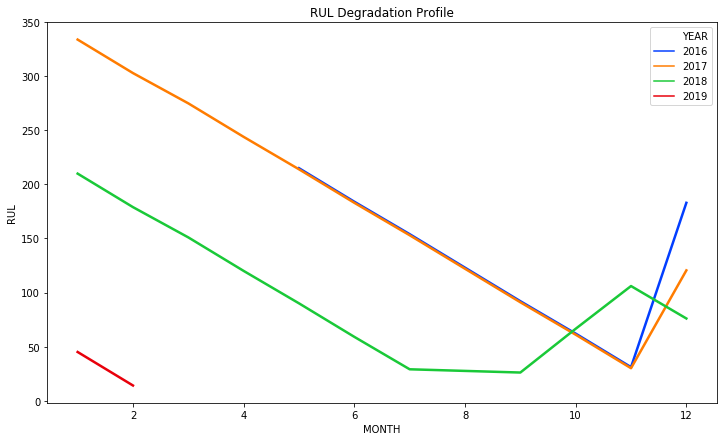

In [0]:
plt.figure(figsize=(12,7))
plt.title("RUL Degradation Profile")
sns.lineplot(x='MONTH', hue='YEAR', y='RUL', palette='bright', data=temp, linewidth=2.5, ci=None)
plt.legend()


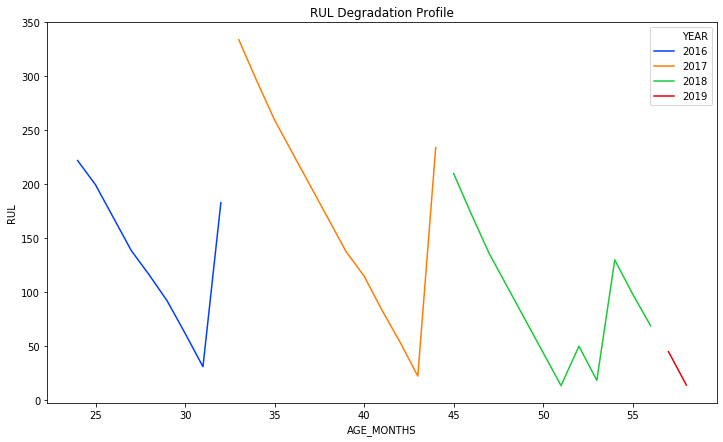

In [0]:
plt.figure(figsize=(12,7))
plt.title("RUL Degradation Profile")
sns.lineplot(x='AGE_MONTHS', hue='YEAR', y='RUL', palette='bright', data=temp, ci=None)
plt.legend()

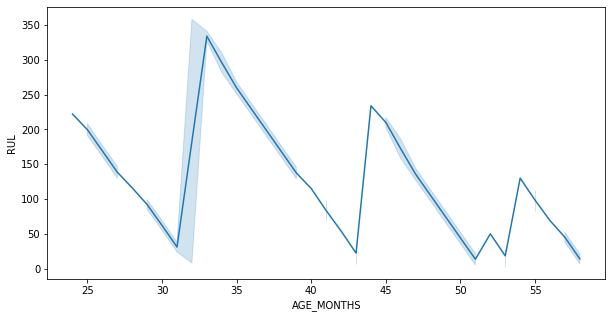

In [0]:
plt.figure(figsize=(10,5))
sns.lineplot(x='AGE_MONTHS', y='RUL', data=temp)

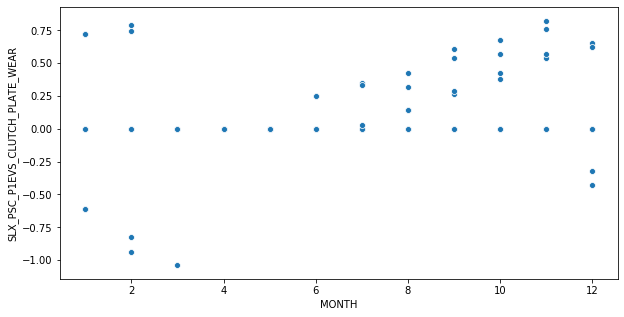

In [0]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='MONTH', y='SLX_PSC_P1EVS_CLUTCH_PLATE_WEAR', data=temp)         

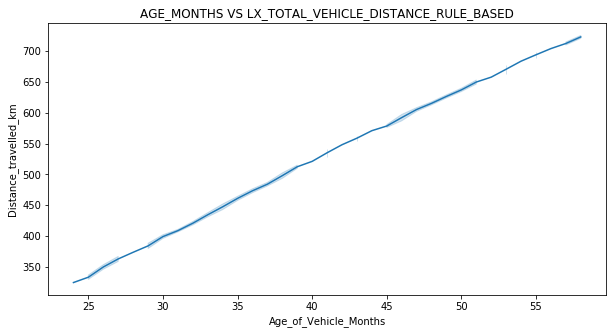

In [0]:
#Graph for justifying accumulative data
plt.figure(figsize=(10,5))
ax = sns.lineplot(x='AGE_MONTHS', y=temp['LX_TOTAL_VEHICLE_DISTANCE_RULE_BASED']/1000, data=temp)
ax.set(xlabel='Age_of_Vehicle_Months', ylabel='Distance_travelled_km')
plt.title("AGE_MONTHS VS LX_TOTAL_VEHICLE_DISTANCE_RULE_BASED")
plt.show()

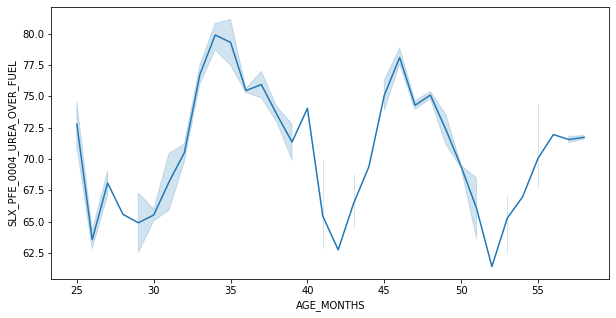

In [0]:
  
plt.figure(figsize=(10,5))
sns.lineplot(x='AGE_MONTHS', y='SLX_PFE_0004_UREA_OVER_FUEL', data=temp)             

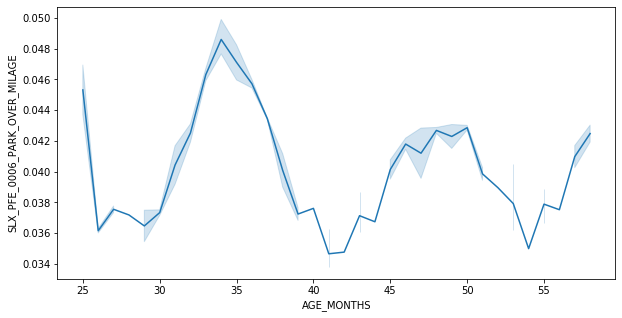

In [0]:
plt.figure(figsize=(10,5))
sns.lineplot(x='AGE_MONTHS', y='SLX_PFE_0006_PARK_OVER_MILAGE', data=temp)     

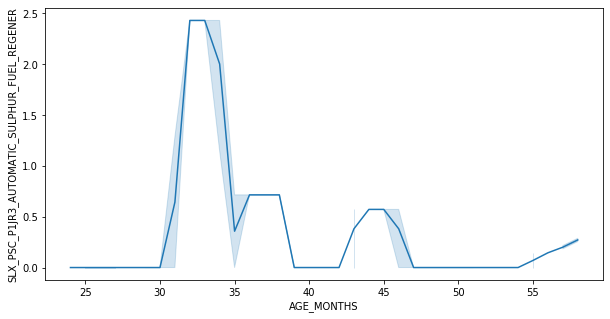

In [0]:

plt.figure(figsize=(10,5))
sns.lineplot(x='AGE_MONTHS', y='SLX_PSC_P1JR3_AUTOMATIC_SULPHUR_FUEL_REGENER', data=temp)  

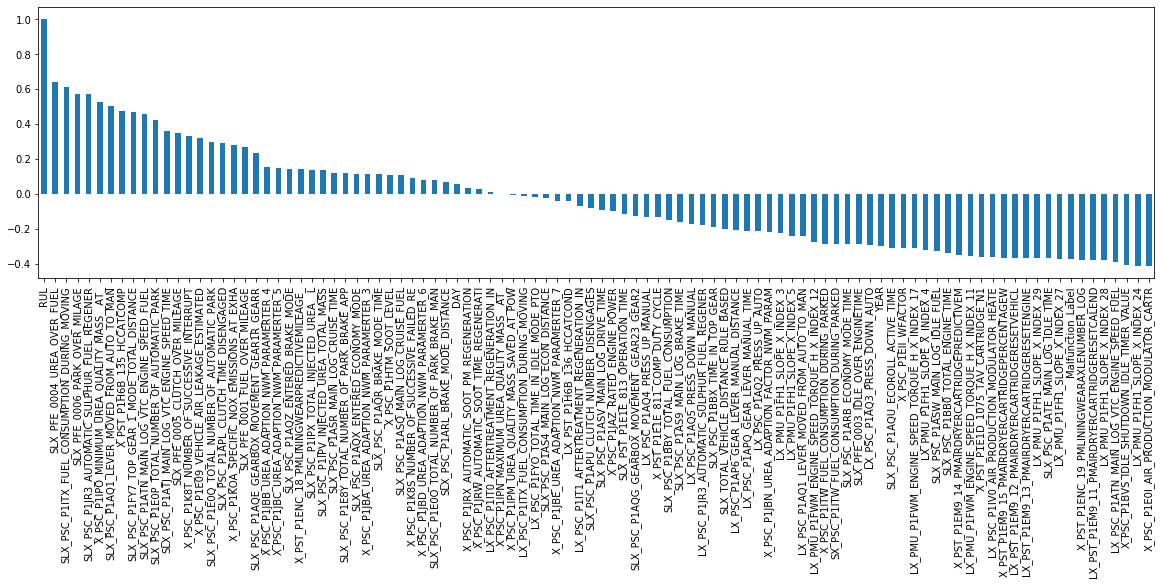

In [0]:
plt.figure(figsize=(20,5))
temp.corr()['RUL'].sort_values(ascending=False)[:100].plot(kind='bar')

In [0]:
data_full['T_CHASSIS'].unique().shape

(445,)